# 1. import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 12,6

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

# 2. import dataset
* 05_sampling dataset is read into the system
* this data contains binned variables

In [4]:
df = pd.read_csv("../01 raw data/05_sampling.csv")
df = df[['transactionID','Fraud','b_accountAge','b_transactionAmountUSD','b_ipCountryCode','b_ipState',
         'b_paymentInstrumentAgeInAccount','b_accountCountry','b_cardType','b_transactionCurrencyCode','b_localHour']]
print(df.shape)

(101207, 11)


In [5]:
df0 = df[df['Fraud']==0].reset_index(drop=True)
df1 = df[df['Fraud']==1].reset_index(drop=True)

df01 = df0[:][:31220]
df02 = df0[:][31220:62440]
df03 = df0[:][62440:]

df11 = df1[:][:2510]
df12 = df1[:][2510:5020]
df13 = df1[:][5020:]

df1 = pd.concat([df01,df11])
df2 = pd.concat([df02,df12])
df3 = pd.concat([df03,df13])

print(df1.shape, df2.shape, df3.shape)

(33730, 11) (33730, 11) (33747, 11)


# 3. Model - 1st iteration
* 9,9

In [6]:
np.random.seed(108)
y = df['Fraud']
x = df.drop(['transactionID','Fraud'], axis=1)
a = 'relu'
o = 'adam'
l = 0.00001
e = 5000
b = 2000

for i in [0,1,2]:
    if i==0: train=pd.concat([df1,df2])
    elif i==2: train=pd.concat([df2,df3])
    else: train=pd.concat([df3,df1])
    train_targets = train['Fraud']
    train_inputs = train.drop(['transactionID','Fraud'], axis=1)

    if i==0: test=df3
    elif i==2: test=df1
    else: test=df2
    validation_targets = test['Fraud']
    validation_inputs = test.drop(['transactionID','Fraud'], axis=1)

    model = Sequential() 
    model.add(Dense(9, activation=a, input_dim=9, kernel_regularizer=l2(l))) 
    model.add(Dense(9, activation=a, kernel_regularizer=l2(l)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(l)))
    model.compile(optimizer=o, loss='binary_crossentropy', metrics='AUC') 
    history =  model.fit(train_inputs, train_targets, batch_size=b, epochs=e, verbose=0,
                         callbacks=EarlyStopping(monitor='loss',patience=3),
                         validation_data=(validation_inputs, validation_targets))
    if i==0: history1 = history
    elif i==2: history3 =  history
    else: history2 = history
        
    test_loss, test_accuracy = model.evaluate(validation_inputs, validation_targets)
    print('\nTest loss: {0:.2f}\t Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

1055/1055 [==============================] - 1s 1ms/step - loss: 0.2259 - auc: 0.7761

Test loss: 0.23	 Test accuracy: 77.61%
1055/1055 [==============================] - 1s 1ms/step - loss: 0.2296 - auc: 0.7626

Test loss: 0.23	 Test accuracy: 76.26%
1055/1055 [==============================] - 1s 1ms/step - loss: 0.2175 - auc: 0.8187

Test loss: 0.22	 Test accuracy: 81.87%


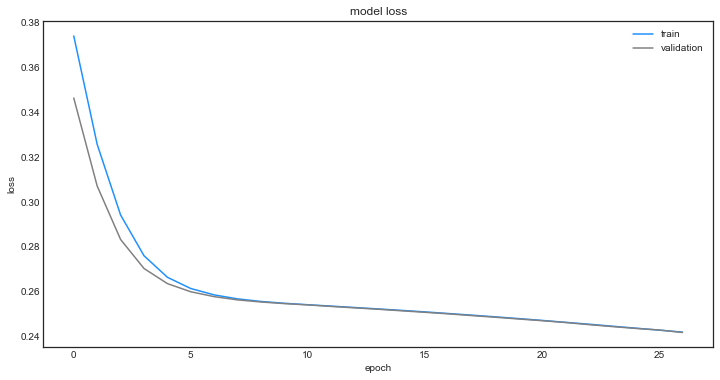

In [7]:
train1 = history1.history['loss'][4:31]
train2 = history2.history['loss'][4:31]
train3 = history3.history['loss'][4:31]
train = pd.DataFrame({'1':train1, 'j':train2, 'k':train3})
train['avg'] = np.mean(train, axis=1)

validation1 = history1.history['val_loss'][4:31]
validation2 = history2.history['val_loss'][4:31]
validation3 = history3.history['val_loss'][4:31]
validation = pd.DataFrame({'1':validation1, 'j':validation2, 'k':validation3})
validation['avg'] = np.mean(validation, axis=1)

plt.plot(train['avg'], color='dodgerblue')
plt.plot(validation['avg'], color='gray')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# 4. Model - 2nd iteration
* 6,6

In [8]:
np.random.seed(108)
y = df['Fraud']
x = df.drop(['transactionID','Fraud'], axis=1)
a = 'relu'
o = 'adam'
l = 0.00005
e = 500
b = 200

for i in [0,1,2]:
    if i==0: train=pd.concat([df1,df2])
    elif i==2: train=pd.concat([df2,df3])
    else: train=pd.concat([df3,df1])
    train_targets = train['Fraud']
    train_inputs = train.drop(['transactionID','Fraud'], axis=1)

    if i==0: test=df3
    elif i==2: test=df1
    else: test=df2
    validation_targets = test['Fraud']
    validation_inputs = test.drop(['transactionID','Fraud'], axis=1)

    model = Sequential() 
    model.add(Dense(6, activation=a, input_dim=9, kernel_regularizer=l2(l))) 
    model.add(Dense(6, activation=a, kernel_regularizer=l2(l)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(l)))
    model.compile(optimizer=o, loss='binary_crossentropy', metrics='AUC') 
    history =  model.fit(train_inputs, train_targets, batch_size=b, epochs=e, verbose=0,
                         callbacks=EarlyStopping(monitor='loss',patience=3),
                         validation_data=(validation_inputs, validation_targets))
    if i==0: history1 = history
    elif i==2: history3 =  history
    else: history2 = history
        
    test_loss, test_accuracy = model.evaluate(validation_inputs, validation_targets)
    print('\nTest loss: {0:.2f}\t Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

1055/1055 [==============================] - 1s 1ms/step - loss: 0.2317 - auc: 0.7710

Test loss: 0.23	 Test accuracy: 77.10%
1055/1055 [==============================] - 1s 1ms/step - loss: 0.2330 - auc: 0.7660

Test loss: 0.23	 Test accuracy: 76.60%
1055/1055 [==============================] - 1s 1ms/step - loss: 0.2275 - auc: 0.8063

Test loss: 0.23	 Test accuracy: 80.63%


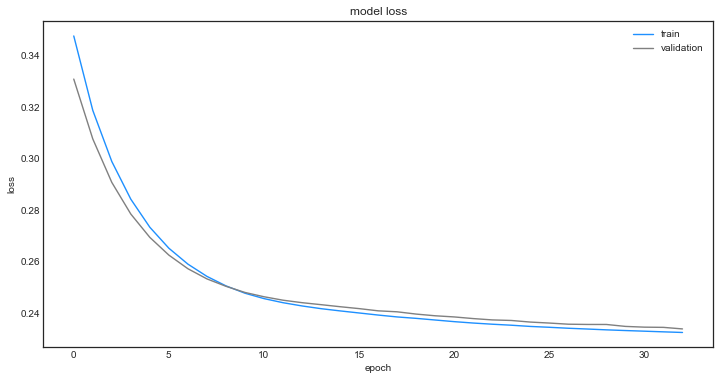

In [9]:
train1 = history1.history['loss'][1:34]
train2 = history2.history['loss'][1:34]
train3 = history3.history['loss'][1:34]
train = pd.DataFrame({'1':train1, 'j':train2, 'k':train3})
train['avg'] = np.mean(train, axis=1)

validation1 = history1.history['val_loss'][1:34]
validation2 = history2.history['val_loss'][1:34]
validation3 = history3.history['val_loss'][1:34]
validation = pd.DataFrame({'1':validation1, 'j':validation2, 'k':validation3})
validation['avg'] = np.mean(validation, axis=1)

plt.plot(train['avg'], color='dodgerblue', lw=1.4)
plt.plot(validation['avg'], color='gray', lw=1.4)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()